In [1]:
#QUESTION:   Can we forecast alcohol sales in Iowa City for the YEAR and MONTH
#University of Iowa

#Data is Aug - Dec for 2012 - 2018

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')


C:\Users\lorig\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
#retrieve the csv from the first step
cityData = read_csv('data/iowaCity2.csv',parse_dates=[1])

### Clean the data

In [4]:
cityData.head()

,Unnamed: 0,Date,Sale_Dollars
0,0,2012-12-03,37.74
1,1,2013-11-14,26.76
2,2,2012-10-02,124.44
3,3,2013-10-31,142.44
4,4,2013-10-07,960.00


In [5]:
cityData = cityData.drop('Unnamed: 0', axis=1)

In [6]:

#change the month datatype
#https://stackoverflow.com/questions/11376080/plot-numpy-datetime64-with-matplotlib
#series['Date'] = pd.to_datetime(series['Date'])

In [7]:
cityData.dtypes

Date            datetime64[ns]
Sale_Dollars           float64
dtype: object

#### The data must be grouped by year and month, and sorted in descending order

In [8]:
#create a new column which is only the month and year
#begin by creating a new df in case I have to go back
cityData1 = cityData

#add the new column
cityData1['monthYear'] = pd.to_datetime(cityData1['Date']).dt.to_period('M')

#display the df
cityData1.head()

,Date,Sale_Dollars,monthYear
0,2012-12-03,37.74,2012-12
1,2013-11-14,26.76,2013-11
2,2012-10-02,124.44,2012-10
3,2013-10-31,142.44,2013-10
4,2013-10-07,960.00,2013-10


In [9]:
#in order to use the df for the model, group all sales by the monthYear.    The Date column will no longer be needed
cityData2 = cityData1.groupby("monthYear").agg({"Sale_Dollars":'sum'})
cityData2.head()

#NOTE:   this df will be used for the 2nd and 3rd parts of the model.  Do not overwrite the df.
#The 1st part of the model will used the date in an object format (not datetime format).  

,Sale_Dollars
monthYear,
2012-08,957518.62
2012-09,752470.35
2012-10,1106908.76
2012-11,731696.31
2012-12,881284.69


In [10]:
#make the index a column
cityData3 = cityData2.rename_axis('monthYear').reset_index()
cityData3.head()

,monthYear,Sale_Dollars
0,2012-08,957518.62
1,2012-09,752470.35
2,2012-10,1106908.76
3,2012-11,731696.31
4,2012-12,881284.69


In [11]:
cityData3.dtypes

monthYear       period[M]
Sale_Dollars      float64
dtype: object

###    Two datatypes.0
There are three parts to the ARIMA model.    
<br> The 1st requires the date be an object datatype (not datetype).   The cityFormat dataframe is created for this piece.

#### cityDateObj2 is the df where the datetime is an object

In [12]:
cityDateObj = cityData3

In [13]:
#Begin by adding  new columns which will contain the month and day as an object.
cityDateObj['monthYearStr'] = cityData3['monthYear'].dt.strftime('%Y/%m/%d')

In [14]:
cityDateObj.head()

,monthYear,Sale_Dollars,monthYearStr
0,2012-08,957518.62,2012/08/31
1,2012-09,752470.35,2012/09/30
2,2012-10,1106908.76,2012/10/31
3,2012-11,731696.31,2012/11/30
4,2012-12,881284.69,2012/12/31


In [15]:
cityDateObj.dtypes

monthYear       period[M]
Sale_Dollars      float64
monthYearStr       object
dtype: object

In [16]:
#Create a new df with ONLY the date as an object and the sales
cityDateObj2 = cityDateObj[['monthYearStr', 'Sale_Dollars']].copy()

In [17]:
cityDateObj2.head()

,monthYearStr,Sale_Dollars
0,2012/08/31,957518.62
1,2012/09/30,752470.35
2,2012/10/31,1106908.76
3,2012/11/30,731696.31
4,2012/12/31,881284.69


In [18]:
cityDateObj2.dtypes

monthYearStr     object
Sale_Dollars    float64
dtype: object

###   ARIMA MODEL

  monthYearStr  Sale_Dollars
0   2012/08/31     957518.62
1   2012/09/30     752470.35
2   2012/10/31    1106908.76
3   2012/11/30     731696.31
4   2012/12/31     881284.69


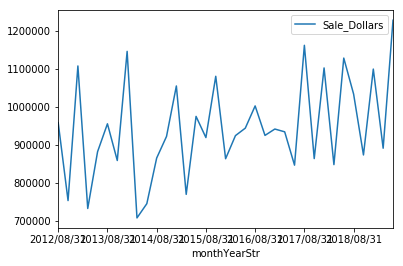

In [19]:
#This model needs an object for the date; therefore, use the cityDateObj2 df.

print(cityDateObj2.head())
cityDateObj2.plot(x='monthYearStr',y='Sale_Dollars')
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:         D.Sale_Dollars   No. Observations:                   34
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -449.422
Method:                       css-mle   S.D. of innovations         131022.654
Date:                Sat, 03 Aug 2019   AIC                            906.844
Time:                        18:38:12   BIC                            912.949
Sample:                    09-30-2012   HQIC                           908.926
                         - 12-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5102.9055   9655.859      0.528      0.601   -1.38e+04     2.4e+04
ar.L1.D.Sale_Dollars    -1.0197      0.161     -6.349      0.000      -1.334      -0.705
ar.L2.D.Sale

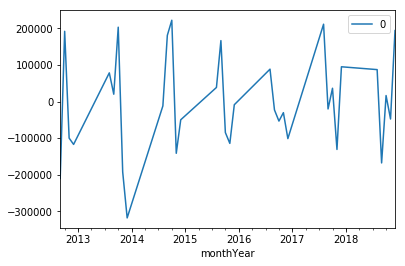

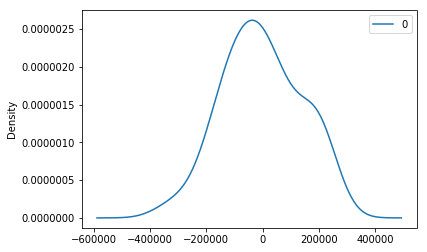

                   0
count      34.000000
mean    -2797.220977
std    136573.042841
min   -318074.929426
25%   -101008.536697
50%    -16171.085788
75%     88117.024195
max    222107.217512


In [20]:
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from pandas import DataFrame
import statsmodels.api as sm

#This model needs a datetime format for the date; therefore, use the cityData2 df.

# fit model
model = ARIMA(cityData2, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=954724.825911, expected=933500.200000
predicted=938053.128466, expected=845722.700000
predicted=923971.559858, expected=1161287.310000
predicted=911863.069668, expected=863034.610000
predicted=1033717.091135, expected=1101677.790000
predicted=992994.384824, expected=847141.360000
predicted=1019675.083235, expected=1127650.470000
predicted=942814.000199, expected=1032842.140000
predicted=1047395.754736, expected=872614.650000
predicted=1072986.747550, expected=1098684.080000
predicted=939373.586720, expected=890348.530000
predicted=1018451.376639, expected=1227274.450000
Test MSE: 15879433972.557


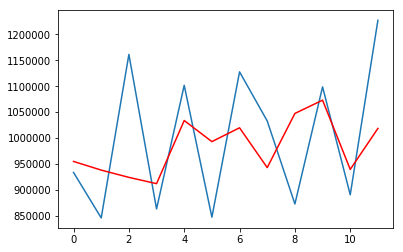

In [21]:
from sklearn.metrics import mean_squared_error

#This model needs a datetime format for the date; therefore, use the cityData2 df.

X = cityData2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()